# OASIS INFOBYTE INTERNSHIP

### TASK-4

### AUTHOR- saja

## EMAIL SPAM DETECTION WITH MACHINE LEARNING

### Importing libraries and data cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score,recall_score

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


##### Importing the dataset

In [3]:
df=pd.read_csv('spam.csv', encoding = ("ISO-8859-1"),low_memory = False)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


##### Checking the descriptive statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Determining the row and column size

df.shape

(5572, 5)

##### Check for null values and duplicate rows in the dataset.

In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

#### Considering the row size, majority of the entries in Unnamed:2,Unnamed:3 and Unnamed:4 are null values.So its better to drop all the three columns

In [7]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1,inplace=True)
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [8]:
# Checking if there is any duplicated values

df.duplicated().sum()

403

##### Removing the duplicated values keeping the first record


In [9]:
df.drop_duplicates(keep='first',inplace=True)
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(5169, 2)

##### # Renaming the columns



In [12]:
df.rename(columns={'v1':'type','v2':'text'},inplace = True)
df.head(3)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


##### converting type into numerical form


In [13]:
df.loc[df['type']=='spam','type']=0
df.loc[df['type']=='ham','type']=1
df.head(3)

,type,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...


In [14]:
df['type']=df['type'].astype('int')

### Data Visualization

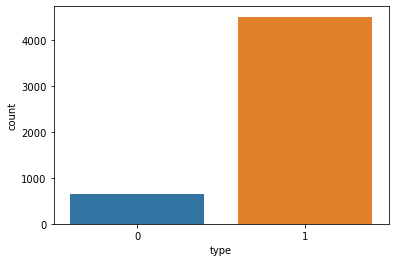

In [15]:
# Countplot of 'type'

sns.countplot(x=df['type'])
plt.show()

### Splitting dataset for training and testing

In [16]:
X=df['text']
X.head(3)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
Name: text, dtype: object

In [17]:
y=df['type']
y.head(3)

0    1
1    1
2    0
Name: type, dtype: int32

In [18]:
# Splitting the dataset into X_train, X_test, y_train and y_test using train_test_split function

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=7)

### Building Model

##### Create a TF-IDF vectorizer to convert text messages into numerical features

In [19]:
vector=TfidfVectorizer()
vector.fit(X_train)

TfidfVectorizer()

##### Convert the training and testing text messages into numerical features using TF-IDF

In [20]:
X_transformed=vector.transform(X_train.values)
X_transformed.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
X_test_transformed=vector.transform(X_test)

#### Here we are using Support Vector Machine to build our model

In [22]:
svmmodel=svm.SVC()
svmmodel.fit(X_transformed,y_train)

SVC()

In [23]:
svm_pred=svmmodel.predict(X_test_transformed)

##### Evaluate the model using accuracy, f1 score, and recall.

In [24]:
print('Classification Report\n')
print(classification_report(svm_pred,y_test))

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       174
           1       1.00      0.97      0.99      1377

    accuracy                           0.98      1551
   macro avg       0.91      0.98      0.94      1551
weighted avg       0.98      0.98      0.98      1551



In [25]:
print('Accuracy=',accuracy_score(svm_pred,y_test))

Accuracy= 0.9754996776273372


##### Visualize the confusion matrix.

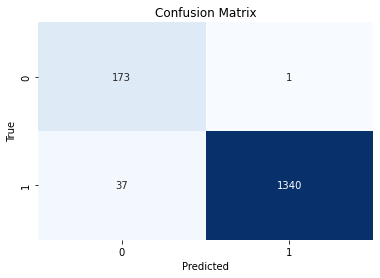

In [26]:
cm=confusion_matrix(svm_pred,y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### The model we built have high accuracy, F1 score and Recall. 

The TfidfVectorizer converts text messages into numerical features by calculating the term frequency-inverse document frequency (TF-IDF) score for each word in the message. This helps to capture the importance of each word in the message.
The support vector machine (SVM) model is a supervised learning algorithm that can be used for classification tasks. The SVM model works by finding a hyperplane that separates the spam and non spam messages in the training set.
The accuracy, f1 score, and recall are measures of the performance of the model. The accuracy score measures the percentage of messages that were correctly classified. The f1 score is a weighted average of the precision and recall scores. The recall score measures the percentage of spam messages that were correctly classified.
The confusion matrix is a table that shows the true and predicted labels for the messages in the testing set. The confusion matrix can be used to visualize the performance of the model.
Overall, the program is able to build a machine learning model that can detect spam and non spam emails with high accuracy, f1 score, and recall.